# DataJoint Element for Pose Estimation with DeepLabCut

### **Open-source Data Pipeline for Markerless Pose Estimation in Neurophysiology**



This tutorial aims to provide a comprehensive understanding of the open-source data pipeline by `Element-DeepLabCut`.

![pipeline](../images/flowchart.svg)

The package is designed to integrate the **model training** and **pose estimation analyses** into a data pipeline and streamline model and video management using DataJoint. 

![pipeline](../images/pipeline.svg)

By the end of this tutorial, you will have a clear grasp of how to set up and integrate the `Element DeepLabCut` into your specific research projects and your lab. 

#### **Key Components and Objectives**



**- Setup**

**- Designing the DataJoint Pipeline**

**- Step 1: Register an Existing Model in the DataJoint Pipeline**

**- Step 2: Insert Example Data into Subject and Session tables**

**- Step 3: Run the DeepLabCut Inference Task**

**- Step 4: Visualize the Results**

### **Setup**

This tutorial examines the **behavior of a freely moving mouse** in an open-field environment.

The goal is to extract pose estimations of the animal's **head and tail base** from video footage. 

The **resulting x and y coordinates** offer valuable insights into the **animal's movements, postures, and interactions** within the environment. 

The results of this Element example can be **combined with other modalities** to create a complete customizable data pipeline for your specific lab or study. For instance, you can combine `element-deeplabcut` with `element-calcium-imaging` and `element-array-ephys` to characterize the neural activity.

#### Steps to Run the Element-DeepLabCut

The input data for this data pipeline is as follows:

- A DeepLabCut (DLC) project folder.

- The labeled training data in your DLC project folder.


This tutorial includes this DLC project folder with example data and the results as well in `example_data` directory. 

Let's start this tutorial by importing the packages necessary to run the data pipeline.

In [1]:
import os
if os.path.basename(os.getcwd())=='notebooks': os.chdir('..')
assert os.path.basename(os.getcwd())=='element-deeplabcut', ("Please move to the "
                                                              + "element directory")

In [2]:
import datajoint as dj
from pathlib import Path
import yaml

This codespace provides a local database private to you for experimentation. Let's connect to the database server:

In [3]:
dj.conn()

[2023-10-19 19:26:24,608][INFO]: Connecting root@fakeservices.datajoint.io:3306
[2023-10-19 19:26:24,616][INFO]: Connected root@fakeservices.datajoint.io:3306


DataJoint connection (connected) root@fakeservices.datajoint.io:3306

### **Design the DataJoint Pipeline**

This tutorial presumes that the `element-deeplabcut` has been pre-configured and instantiated, with the database linked downstream to pre-existing `subject` and `session` tables. 

Now, we will proceed to import the essential schemas required to construct this data pipeline, with particular attention to the primary components: `train` and `model`.

In [4]:
from tutorial_pipeline import lab, subject, session, train, model  

[2023-10-19 19:26:26,055][WARNING]: lab.Project and related tables will be removed in a future version of Element Lab. Please use the project schema.


We can represent a diagram of some of the upstream and downstream dependencies connected to these `model` and `train` schemas:

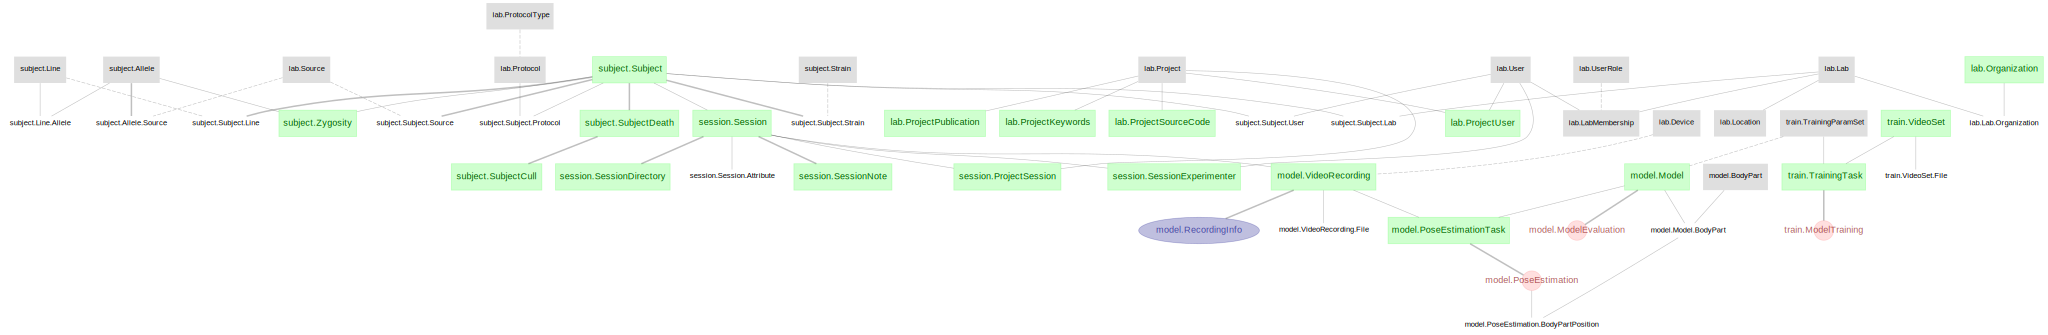

In [5]:
(
    dj.Diagram(subject) 
    + dj.Diagram(lab) 
    + dj.Diagram(session) 
    + dj.Diagram(model) 
    + dj.Diagram(train)
)

As evident, this data pipeline is fairly comprehensive, encompassing several tables associated with different DeepLabCut components like model, train, and evaluation. A few tables, such as `Subject` or `Lab`, while integral to the pipeline, fall outside the scope of the scope of element-deeplabcut tutorial as they are upstream. 

Our focus in this tutorial will be primarily on the two core schemas:

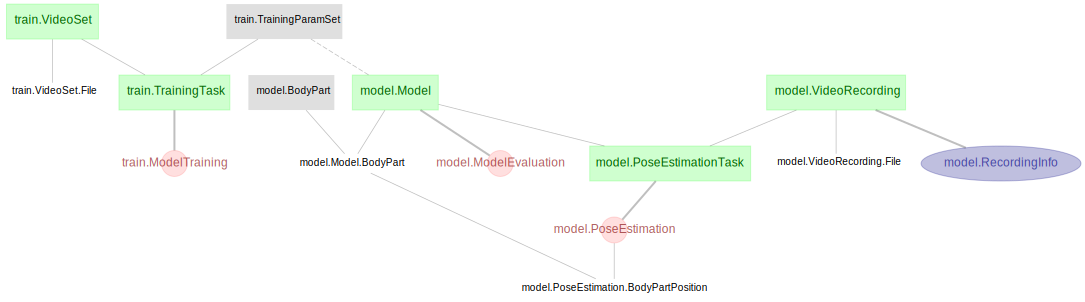

In [6]:
dj.Diagram(train) + dj.Diagram(model)

This diagram represents an example of the `element-deeplabcut` pipeline.

### **Step 1 - Register an Existing Model in the DataJoint Pipeline**

A DeepLabCut project adheres to a specific folder structure, featuring a `config.yaml` file that outlines the model's specifications (located within the `example_data/inbox` directory). 

To "register" this DLC model into the pipeline, the initial step is to define the path to the configuration file. Subsequently, this path should be provided as an input to the function responsible for executing the model registration process.

In [7]:
config_file_rel = "./example_data/inbox/from_top_tracking-DataJoint-2023-10-11/config.yaml"

The `insert_new_model` function serves as a convenient function within the `element-deeplacut` for simplifying the model registration process.

Upon execution, this function generates a printout featuring vital details such as the `model_name` and `model_description`, along with pertinent information extracted from the configuration file. If all the information is accurate and in order, you can initiate the insertion process by typing 'yes', which will result in the registration of the new model, including its two associated body parts, `head` and `tailbase`.

In [8]:
model.Model.insert_new_model(model_name='from_top_tracking_model_test',
                             dlc_config=config_file_rel,
                             shuffle=1,
                             trainingsetindex=0,
                             model_description='Model in example data: from_top_tracking model')

2023-10-19 19:26:49.961931: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-19 19:26:50.069069: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/site-packages/cv2/../../lib64:/lib:/opt/conda/lib
2023-10-19 19:26:50.069107: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-10-19 19:26:50.091643: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has

Loading DLC 2.3.7...
DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)
--- DLC Model specification to be inserted ---
	model_name: from_top_tracking_model_test
	model_description: Model in example data: from_top_tracking model
	scorer: DLCresnet50fromtoptrackingOct11shuffle1
	task: from_top_tracking
	date: Oct11
	iteration: 0
	snapshotindex: -1
	shuffle: 1
	trainingsetindex: 0
	project_path: from_top_tracking-DataJoint-2023-10-11
	paramset_idx: None
	-- Template/Contents of config.yaml --
		Task: from_top_tracking
		scorer: DataJoint
		date: Oct11
		multianimalproject: False
		identity: None
		project_path: /workspaces/element-deeplabcut/example_data/inbox/from_top_tracking-DataJoint-2023-10-11
		video_sets: {'/Users/milagros/Desktop/from_top_tracking-DataJoint-2023-10-11/videos/test.mp4': {'crop': '0, 500, 0, 500'}, '/Users/milagros/Desktop/from_top_tracking-DataJoint-2023-10-11/videos/train1.mp4': {'crop': '0, 500, 0, 500'}}
		bodyparts: ['hea

You can check the `Model` table to confirm that the new model has been registered:

In [9]:
model.Model()

model_name User-friendly model name,task Task in the config yaml,date Date in the config yaml,iteration Iteration/version of this model,"snapshotindex which snapshot for prediction (if -1, latest)",shuffle Shuffle (1) or not (0),trainingsetindex Index of training fraction list in config.yaml,scorer Scorer/network name - DLC's GetScorerName(),config_template Dictionary of the config for analyze_videos(),project_path DLC's project_path in config relative to root,model_prefix,model_description,paramset_idx
from_top_tracking_model_test,from_top_tracking,Oct11,0,-1,1,0,DLCresnet50fromtoptrackingOct11shuffle1,=BLOB=,from_top_tracking-DataJoint-2023-10-11,,Model in example data: from_top_tracking model,None


A significant portion of this data is directly extracted from the `config` file. 

It's important to highlight that every model added to the `model` table is unique and singular. When introducing a new model, it is mandatory to define a new `model_name`. Replicating an existing model is not permitted; the new model must be entirely distinct. Even if you attempt to employ a different `model_name` for a previously registered model, `DataJoint` will identify this duplication and trigger an error. This model management protocol is crucial for maintining data integrity.

### **Step 2 - Insert Subject, Session, and Behavior Videos**

Now, let's delve into the `Subject` and `Session` tables and include some example data.

In [10]:
subject.Subject()

subject,subject_nickname,sex,subject_birth_date,subject_description


Add a new entry for a subject in the `Subject` table:

In [11]:
# Subject and Session tables
subject.Subject.insert1(
    dict(
        subject="subject6",
        sex="F",
        subject_birth_date="2020-01-01",
        subject_description="hneih_E105",
    ),
    skip_duplicates=True,
)

Create session keys and input them into the `Session` table: 



In [12]:
#Definition of the dictionary named "session_keys"
session_keys = [
    dict(subject="subject6", session_datetime="2021-06-02 14:04:22"),
    dict(subject="subject6", session_datetime="2021-06-03 14:43:10"),
]

#Insert this dictionary in the Session table
session.Session.insert(session_keys, skip_duplicates=True)


Confirm the inserted data:

In [13]:
session.Session()

subject,session_datetime
subject6,2021-06-02 14:04:22
subject6,2021-06-03 14:43:10


Insert data into the `VideoRecording` table as well:

In [14]:
recording_key = {'subject': 'subject6',
       'session_datetime': '2021-06-02 14:04:22',
       'recording_id': '1'}
model.VideoRecording.insert1({**recording_key, 'device': 'Camera1'}, skip_duplicates=True)

Insert video files into the `VideoRecording.File` table:

In [15]:
video_files = ["./example_data/inbox/from_top_tracking-DataJoint-2023-10-11/videos/train1.mp4"]

model.VideoRecording.File.insert({
    **recording_key, 
    'file_id': v_idx, 
    'file_path': Path(f)} for v_idx, f in enumerate(video_files))

Now, populate the `RecordingInfo` table will extract the metadata from the video sets and storing it in the table. 

This metadata will serve as a valuable resource for subsequent analyses reliant on video characteristics and as a `lookup` table for accessing this video data whenever necessary.

In [16]:
model.RecordingInfo.populate()
model.RecordingInfo()

subject,session_datetime,recording_id,px_height height in pixels,px_width width in pixels,nframes number of frames,fps (Hz) frames per second,recording_datetime Datetime for the start of the recording,recording_duration video duration (s) from nframes / fps
subject6,2021-06-02 14:04:22,1,500,500,60000,60,None,1000.0


We can confirm the accuracy of the inference analysis by cross-referencing it with the number of frames extracted (`nframes`). This count of frames should align with the number of entries for each body part in the pose estimation results.

### **Step 3 - DeepLabCut Inference Task**

The `PoseEstimationTask` table serves the purpose of specifying an inference task. Let's delve into the table description:

In [17]:
model.PoseEstimationTask.describe()

-> model.VideoRecording
-> model.Model
---
task_mode="load"     : enum('load','trigger')       # load results or trigger computation
pose_estimation_output_dir="" : varchar(255)                 # output dir relative to the root dir
pose_estimation_params=null : longblob                     # analyze_videos params, if not default



'-> model.VideoRecording\n-> model.Model\n---\ntask_mode="load"     : enum(\'load\',\'trigger\')       # load results or trigger computation\npose_estimation_output_dir="" : varchar(255)                 # output dir relative to the root dir\npose_estimation_params=null : longblob                     # analyze_videos params, if not default\n'

Defining and inserting a pose estimation task requires:

1. Define a video recording.
2. Choose a model.
3. Select a task mode ("load" or "trigger").
4. Specify the output directory and any optional parameters.

When utilizing the "trigger" task mode, DataJoint initiates the inference process, running the DeepLabCut model. The duration of this process can vary, depending on the available hardware. If your hardware lacks GPU support, it's advisable to avoid this mode for this tutorial.

For this particular exercise, we have opted for the **"load" task** mode since the server lacks the necessary GPU resources for inference. The inference results have already been prepared and can be found in the `example_data\outbox` directory. 

If you choose the **"trigger" task** mode, DataJoint will handle the entire inference process and produce these sets of files.

Now, let's establish the keys for the pose estimation task: the recording identifiers, and the chosen model.

In [18]:
recording_key

{'subject': 'subject6',
 'session_datetime': '2021-06-02 14:04:22',
 'recording_id': '1'}

In [19]:
task_key = {**recording_key, 'model_name': 'from_top_tracking_model_test'}

The results can be found at the `pose_estimation_output_dir` location.

In [20]:
model.PoseEstimationTask.insert1(
    {**task_key,
     'task_mode': 'load',
     'pose_estimation_output_dir': './example_data/outbox/from_top_tracking-DataJoint-2023-10-11/videos/device_1_recording_1_model_from_top_tracking_100000_maxiters'
     })

Show the contents of the `PoseEstimationTask` table.

In [21]:
model.PoseEstimationTask()

subject,session_datetime,recording_id,model_name User-friendly model name,task_mode load results or trigger computation,pose_estimation_output_dir output dir relative to the root dir,"pose_estimation_params analyze_videos params, if not default"
subject6,2021-06-02 14:04:22,1,from_top_tracking_model_test,load,./example_data/outbox/from_top_tracking-DataJoint-2023-10-11/videos/device_1_recording_1_model_from_top_tracking_100000_maxiters,=BLOB=


In [22]:
model.PoseEstimation.populate()

Now, let's examine the contents of the `PoseEstimation` table.

In [23]:
model.PoseEstimation()

subject,session_datetime,recording_id,model_name User-friendly model name,pose_estimation_time time of generation of this set of DLC results
subject6,2021-06-02 14:04:22,1,from_top_tracking_model_test,2023-10-12 15:21:47


One of the most crucial table is `PoseEstimation.BodyPartPosition` as it will store the results of the inference: x and y coordinates, and likelihood of the pose estimation.

In [24]:
model.PoseEstimation.BodyPartPosition()

subject,session_datetime,recording_id,model_name User-friendly model name,body_part,frame_index frame index in model,x_pos,y_pos,z_pos,likelihood
subject6,2021-06-02 14:04:22,1,from_top_tracking_model_test,head,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
subject6,2021-06-02 14:04:22,1,from_top_tracking_model_test,tailbase,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=


Following the pose estimation process, the task-related entries encompass: `subject`, `session`, `recording_id`, `model name`, and each detected `body_part` (in this case, two entries).

Each entry includes `frame_index`, `x_pos` and `y_pos` positions, along with a `likelihood` value (`z_pos` is `None`). 

These results can be retrieved in the form of a Pandas DataFrame.

In [25]:
df = (model.PoseEstimation.BodyPartPosition & task_key).fetch(format='frame').reset_index()

In [26]:
df

,subject,session_datetime,recording_id,model_name,body_part,frame_index,x_pos,y_pos,z_pos,likelihood
0,subject6,2021-06-02 14:04:22,1,from_top_tracking_model_test,head,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[273.9966125488281, 274.1033630371094, 274.032...","[314.97100830078125, 315.1459655761719, 315.13...",None,"[0.999998927116394, 0.999998927116394, 0.99999..."
1,subject6,2021-06-02 14:04:22,1,from_top_tracking_model_test,tailbase,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[254.29002380371094, 254.2755584716797, 254.26...","[275.48602294921875, 275.44000244140625, 275.4...",None,"[0.9999996423721313, 0.9999996423721313, 0.999..."


`frame_index` consists of an array of frame numbers, `x_pos` is a NumPy array of x positions, and `likelihood` is a NumPy array as well.


Retrieve the data using the `fetch` method, store it as a Pandas DataFrame, and apply the `explode` function to expand the x and y positions.

In [27]:
df = df.explode(['frame_index', 'x_pos', 'y_pos', 'likelihood']).reset_index()
df

,index,subject,session_datetime,recording_id,model_name,body_part,frame_index,x_pos,y_pos,z_pos,likelihood
0,0,subject6,2021-06-02 14:04:22,1,from_top_tracking_model_test,head,0,273.996613,314.971008,None,0.999999
1,0,subject6,2021-06-02 14:04:22,1,from_top_tracking_model_test,head,1,274.103363,315.145966,None,0.999999
2,0,subject6,2021-06-02 14:04:22,1,from_top_tracking_model_test,head,2,274.032654,315.133331,None,0.999999
3,0,subject6,2021-06-02 14:04:22,1,from_top_tracking_model_test,head,3,274.025238,315.152283,None,0.999999
4,0,subject6,2021-06-02 14:04:22,1,from_top_tracking_model_test,head,4,274.073181,315.173248,None,0.999999
...,...,...,...,...,...,...,...,...,...,...,...
119995,1,subject6,2021-06-02 14:04:22,1,from_top_tracking_model_test,tailbase,59995,323.293884,33.214066,None,1.0
119996,1,subject6,2021-06-02 14:04:22,1,from_top_tracking_model_test,tailbase,59996,321.602264,32.794708,None,1.0
119997,1,subject6,2021-06-02 14:04:22,1,from_top_tracking_model_test,tailbase,59997,320.173981,32.857304,None,1.0
119998,1,subject6,2021-06-02 14:04:22,1,from_top_tracking_model_test,tailbase,59998,318.708618,33.147358,None,0.999999


As mentioned earlier, a validation step for these results involves verifying the number of entries. Each body part should have 60,000 frames, aligning with the `nframes` value stored in the `RecordingInfo` table.

### **Step 4 - Visualization of results**

First, separate the data for the head and tailbase. 

Following this, create two plots: (1) for the head pose estimation, and (2) for the tail base pose estimation.

In [28]:
import matplotlib.pyplot as plt

head_data = df[df['body_part'] == 'head']
tail_data = df[df['body_part'] == 'tailbase']

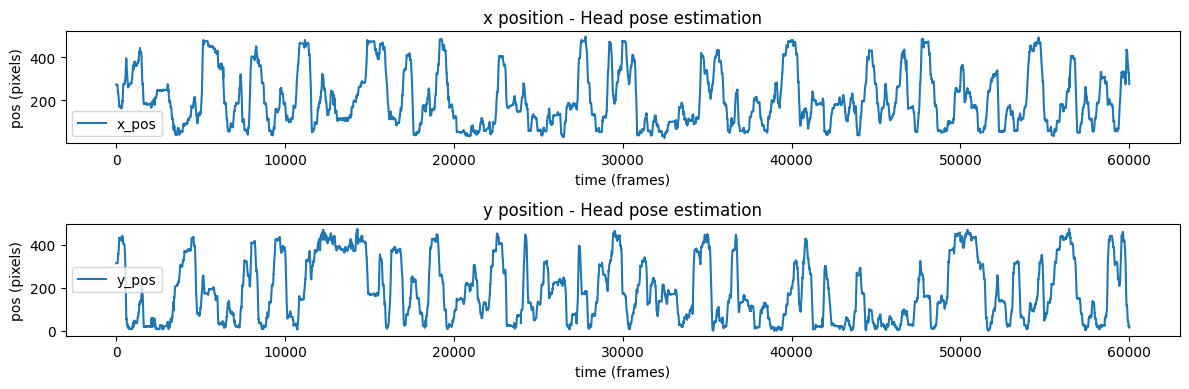

In [29]:
fig, axs = plt.subplots(2,1, figsize=(12, 4))

axs[0].set_title('x position - Head pose estimation')
axs[0].plot(head_data['x_pos'], label='x_pos')
axs[0].set_xlabel('time (frames)')
axs[0].set_ylabel('pos (pixels)')
axs[0].legend()

axs[1].set_title('y position - Head pose estimation')
axs[1].plot(head_data['y_pos'], label='y_pos')
axs[1].set_xlabel('time (frames)')
axs[1].set_ylabel('pos (pixels)')
axs[1].legend()

plt.tight_layout()
plt.show()

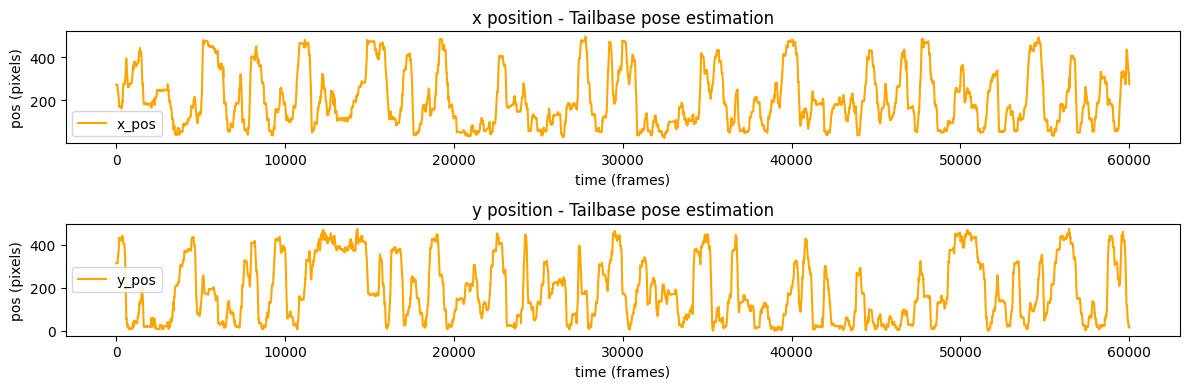

In [30]:
fig, axs = plt.subplots(2,1, figsize=(12, 4))
axs[0].set_title('x position - Tailbase pose estimation')
axs[0].plot(head_data['x_pos'], label='x_pos',color='orange')
axs[0].set_xlabel('time (frames)')
axs[0].set_ylabel('pos (pixels)')
axs[0].legend()

axs[1].set_title('y position - Tailbase pose estimation')
axs[1].plot(head_data['y_pos'], label='y_pos',color='orange')
axs[1].set_xlabel('time (frames)')
axs[1].set_ylabel('pos (pixels)')
axs[1].legend()

plt.tight_layout()
plt.show()

Lastly, let's generate a plot that displays the head and tailbase positions on the same graph.

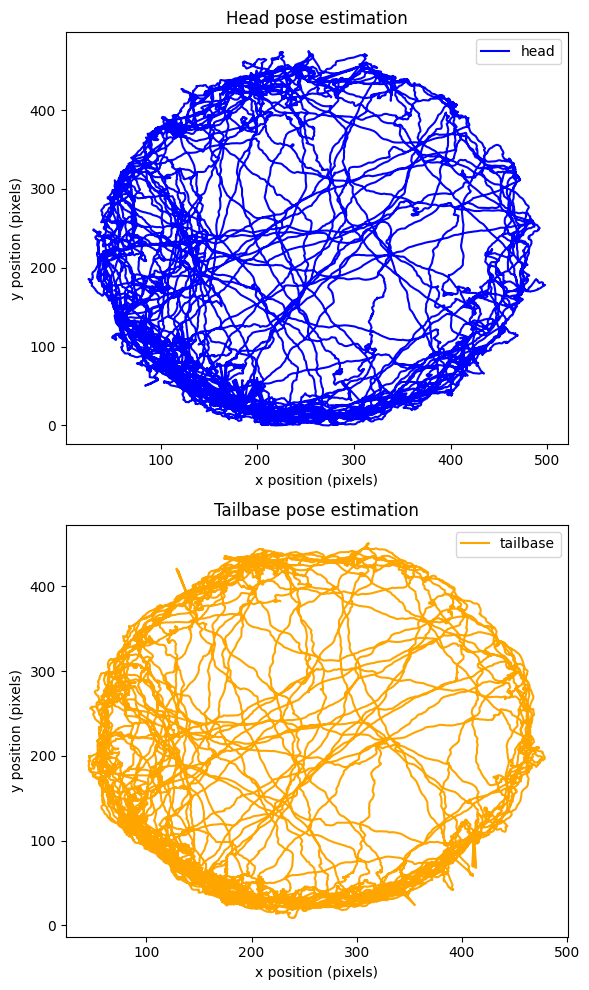

In [31]:
fig, axs = plt.subplots(2,1, figsize=(6,10))

axs[0].set_title('Head pose estimation')
axs[0].plot(head_data['x_pos'], head_data['y_pos'],label='head',color='blue')
axs[0].set_xlabel('x position (pixels)')
axs[0].set_ylabel('y position (pixels)')
axs[0].legend()

axs[1].set_title('Tailbase pose estimation')
axs[1].plot(tail_data['x_pos'], tail_data['y_pos'], label='tailbase',color='orange')
axs[1].set_xlabel('x position (pixels)')
axs[1].set_ylabel('y position (pixels)')
axs[1].legend()

plt.tight_layout()
plt.show()

We have generated the spatial mapping plot for both body parts, head and tail base.

### Summary

Following this tutorial, we've efficiently:
- covered the essential functionality of `element-deeplabcut`
- acquired the skills to integrate an existing DLC model into the pipeline
- insert data into tables
- execute the pose estimation procedure
- visualize the outcomes

#### Documentation and DataJoint tutorials

For detailed documentation on `element-deeplabcut`:

[`DataJoint Element for DeepLabCut - Documentation`](https://datajoint.com/docs/elements/element-deeplabcut/0.2/)


For detailed documentation and tutorials on general DataJoint principles that support collaboration, automation, reproducibility, and visualizations:

[`DataJoint for Python - Interactive Tutorials`](https://github.com/datajoint/datajoint-tutorials) covers fundamentals, including table tiers, query operations, fetch operations, automated computations with the make function, and more.

[`DataJoint for Python - Documentation`](https://datajoint.com/docs/core/datajoint-python/0.14/)